In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
SZ = 12

colors = sns.color_palette(n_colors=4)
POS_THRESH = 10
MARGIN = 0.12

In [3]:
def read_df_or(sheet_name, what):
    or_df = pd.read_excel('odds_ratio_basic_and_adjusted.xlsx', sheet_name=sheet_name, header=[0,1])
    idx = pd.IndexSlice
    df = or_df.loc[:,idx[['param_name',what],:]].copy()
    df.columns = df.columns.droplevel()
    df_or = df.copy()
    df_or['lower'] = df_or['CI'].str.split('-', expand=True)[0].str[1:].astype(float)
    df_or['upper'] = df_or['CI'].str.split('-', expand=True)[1].str[:-1].astype(float)
    df_or['log_lower'] = np.log(df_or['lower'])
    df_or['log_upper'] = np.log(df_or['upper'])
    df_or['log_or_positive_negative'] = np.log(df_or['OR'])
    return df_or


def plot_or(df_or,ax,symp_order, lbl='',color=colors[0], _margin=0):
    suffix = ''
    y = np.array([symp_order[i] for i in df_or.param_name])
    x = df_or[f'log_or_positive_negative{suffix}']
    xerr = df_or[[f'log_lower{suffix}', f'log_upper{suffix}']].values.T
    ax.scatter(x, y-_margin, marker='o', s=140, facecolors=color, edgecolors='k', alpha=0.6, label=lbl)
    ax.plot(xerr, [y-_margin,y-_margin], color='k', alpha=0.4)

# Plot

In [4]:
sheet_name='odds_ratio_quest_adults'
symp_order_1 = pd.read_excel('odds_ratio_basic_and_adjusted.xlsx', sheet_name=sheet_name, skiprows=1).iloc[:,:2]
sheet_name='odds_ratio_doc_adults'
symp_order_2 = pd.read_excel('odds_ratio_basic_and_adjusted.xlsx', sheet_name=sheet_name, skiprows=1).iloc[:,:2]

symp_order_df = symp_order_1.merge(symp_order_2, on='param_name', how='outer', suffixes=['_surv', '_doc'])
symp_order_df['tmp_max_or'] = symp_order_df[['OR_surv', 'OR_doc']].max(axis=1)
symp_order_df = symp_order_df.sort_values(['tmp_max_or'], ascending=True).reset_index(drop=True)
symp_order = symp_order_df.reset_index()[['index','param_name']].set_index('param_name').to_dict()['index']

symp_order_df.head()

,param_name,OR_surv,OR_doc,tmp_max_or
0,Conjunctivitis,NaN,0.13,0.13
1,Abdominal pain,NaN,0.53,0.53
2,Dizziness,NaN,0.57,0.57
3,Emotional disturbance,NaN,0.67,0.67
4,Sore throat,0.69,0.35,0.69


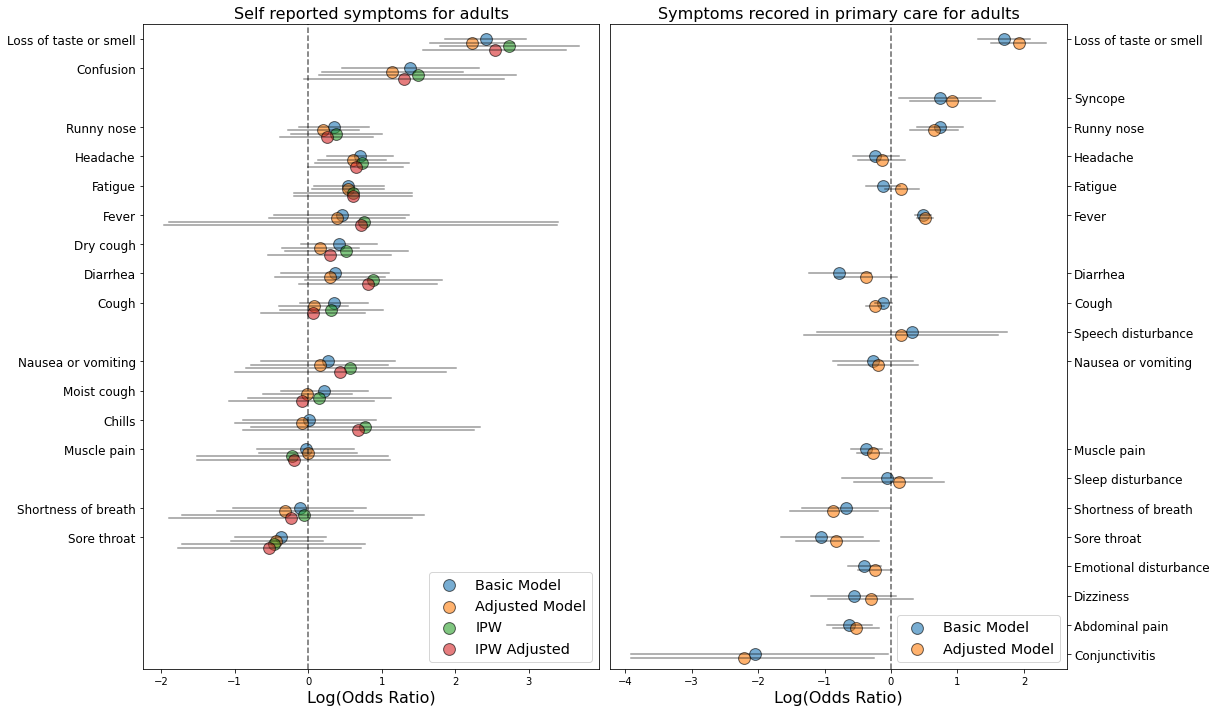

In [5]:
fig, axes = plt.subplots(1,2,figsize=(17,10))


ax = axes[0]
sheet_name='odds_ratio_quest_adults'
for i, what in enumerate(['Basic Model', 'Adjusted Model', 'IPW', 'IPW Adjusted']):
    _margin = MARGIN*i
    df_or = read_df_or(sheet_name, what)
    plot_or(df_or,ax,symp_order,what, colors[i], _margin)

ax.legend(fontsize='x-large', loc='lower right')
y = np.array([symp_order[i] for i in df_or['param_name']])
ax.set_yticks(y);
ax.set_yticklabels([c for c in df_or['param_name']], fontsize=SZ);
ax.set_xlabel('Log(Odds Ratio)', size=SZ+4)
# ax.set_ylabel('Symptoms', size=SZ+2)
ax.set_ylim(-0.5,len(symp_order)-0.5)
ax.axvline(0, color='k', ls='--', alpha=0.6)
ax.set_title('Self reported symptoms for adults', fontsize=SZ+4)


ax = axes[1]
sheet_name='odds_ratio_doc_adults'
for i, what in enumerate(['Basic Model', 'Adjusted Model']):
    _margin = MARGIN*i
    df_or = read_df_or(sheet_name, what)
    plot_or(df_or,ax,symp_order,what, colors[i], _margin)

ax.legend(fontsize='x-large', loc='lower right')
ax.yaxis.tick_right()
y = np.array([symp_order[i] for i in df_or['param_name']])
ax.set_yticks(y);
ax.set_yticklabels([c for c in df_or['param_name']], fontsize=SZ);
ax.set_xlabel('Log(Odds Ratio)', size=SZ+4)
ax.set_ylim(-0.5,len(symp_order)-0.5)
ax.axvline(0, color='k', ls='--', alpha=0.6)
ax.set_title('Symptoms recored in primary care for adults', fontsize=SZ+4)


fig.tight_layout()
fig.savefig('Log_OR.jpg', dpi=120)

# Children

In [6]:
sheet_name='odds_ratio_doc_children'
symp_order_children_df = pd.read_excel('odds_ratio_basic_and_adjusted.xlsx', sheet_name=sheet_name, skiprows=1).iloc[:,:2]

symp_order_children_df = symp_order_children_df.sort_values(['OR'], ascending=True).reset_index(drop=True)
symp_order_children = symp_order_children_df.reset_index()[['index','param_name']].set_index('param_name').to_dict()['index']

symp_order_children_df.tail()

,param_name,OR
15,Fatigue,1.39
16,Sleep disturbance,1.47
17,Emotional disturbance,2.03
18,Syncope,2.45
19,Loss of taste or smell,2.45


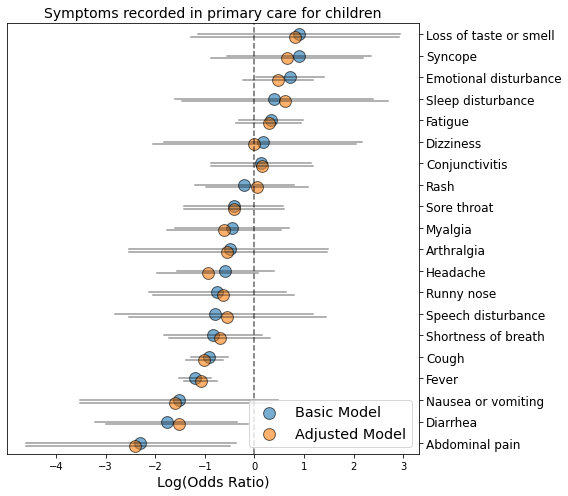

In [7]:
fig, ax = plt.subplots(1,1,figsize=(8,7))

sheet_name='odds_ratio_doc_children'
for i, what in enumerate(['Basic Model', 'Adjusted Model']):
    _margin = MARGIN*i
    df_or = read_df_or(sheet_name, what)
    plot_or(df_or,ax, symp_order_children,what, colors[i], _margin)

ax.legend(fontsize='x-large', loc='lower right')
ax.yaxis.tick_right()
y = np.array([symp_order_children[i] for i in df_or['param_name']])
ax.set_yticks(y);
ax.set_yticklabels([c for c in df_or['param_name']], fontsize=SZ);
ax.set_xlabel('Log(Odds Ratio)', size=SZ+2)
ax.set_ylim(-0.5,len(symp_order_children)-0.5)
ax.axvline(0, color='k', ls='--', alpha=0.6)
ax.set_title('Symptoms recorded in primary care for children', fontsize=SZ+2)


fig.tight_layout()
fig.savefig('Log_OR_Children.jpg', dpi=80)